<a href="https://colab.research.google.com/github/snghynn/ESAA-YB/blob/main/mini_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 불러오기
train = pd.read_csv("movies_train.csv")
test = pd.read_csv("movies_test.csv")
submission = pd.read_csv("submission.csv") # 제출용 파일

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [ ]:
pd.options.display.float_format = '{:.1f}'.format # 소숫점 자리수 출력값 format 설정

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [ ]:
### 결측치가 있는 컬럼의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
# 데이터 타입 전처리
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [ ]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year'] = train['release_time'].dt.year # 년도
train['release_month'] = train['release_time'].dt.month # 월
train['release_day'] = train['release_time'].dt.day     # 일
train['release_weekday'] = train['release_time'].dt.weekday # 요일

test['release_year'] = test['release_time'].dt.year # 년도
test['release_month'] = test['release_time'].dt.month # 월
test['release_day'] = test['release_time'].dt.day     # 일
test['release_weekday'] = test['release_time'].dt.weekday # 요일

In [ ]:
# 기존의 release_time은 제거하기

train = train.drop('release_time', axis = 1)
test = test.drop('release_time', axis = 1)

In [ ]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3


In [ ]:
test.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month,release_day,release_weekday
0,용서는 없다,시네마서비스,느와르,125,청소년 관람불가,김형준,300529.0,2,304,3,2010,1,7,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,342700.2,4,275,3,2010,1,14,3
2,하모니,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4206610.7,3,419,7,2010,1,28,3
3,의형제,(주)쇼박스,액션,116,15세 관람가,장훈,691342.0,2,408,2,2010,2,4,3
4,평행 이론,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,31738.0,1,380,1,2010,2,18,3


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


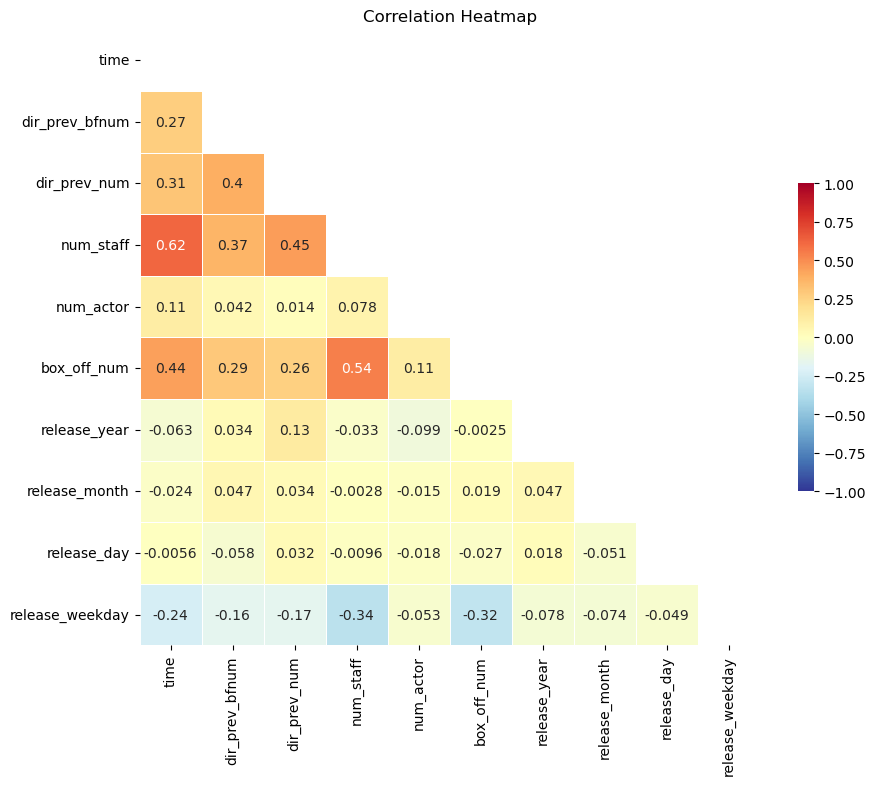

In [ ]:
# 피처 선택 & 가공(Feature Selection & Engineering)
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 영화 제목은 영화마다 모두 다름
# 영화의 관객수와 그닥 관련이 없을 것이라 판단되기에 제거

train = train.drop(['title'], axis= 1)
test = test.drop(['title'], axis= 1)

In [ ]:
### 배급사(distributor) 분포 확인

train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로 처리

distributor_list = train.distributor.value_counts()[:5]

def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
### 배급사(distributor) 분포 재확인

train.distributor.value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

In [ ]:
### 장르 분포 확인

train.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# 상위 5개의 장르를 제외하고 '기타'로 처리

genre_list = train.genre.value_counts()[:5]

def func2(genre):
    if genre in genre_list:
        return genre
    else:
        return '기타'

train['genre'] = train['genre'].apply(lambda x : func2(x))
test['genre'] = test['genre'].apply(lambda x : func2(x))

In [ ]:
### 장르 분포 재확인

train.genre.value_counts()

드라마       221
기타        113
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
Name: genre, dtype: int64

In [ ]:
# 감독이름_너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [ ]:
# 감독의 이전 영화에서의 평균 관객수는 대부분 알려지지 않음
# 의미가 없는 변수로 판단되기에 제거

train = train.drop(['dir_prev_bfnum'],axis = 1)
test = test.drop(['dir_prev_bfnum'],axis = 1)

In [ ]:
# 개봉년도와 영화 관객수에는 큰 연관성이 없어 보임
# 해당 변수를 제거

train = train.drop('release_year', axis= 1)
test = test.drop('release_year', axis= 1)

In [ ]:
def get_season(x):
  if x == 3 or x == 4 or x == 5:
    return 'spring'
  elif x == 6 or x == 7 or x == 8:
    return 'summer'
  elif x == 9 or x == 10 or x == 11:
    return 'autumn'
  else:
    return 'winter'

In [ ]:
train['release_season'] = train['release_month'].apply(get_season)

In [ ]:
### 월, 계절에 관련된 컬럼들을 모두 제거

train = train.drop(['release_month', 'release_season'], axis= 1)
test = test.drop(['release_month'], axis= 1)

In [ ]:
# 개봉년도와 영화 관객수에는 큰 연관성이 없어 보임
# 해당 변수를 제거

train = train.drop('release_day', axis= 1)
test = test.drop('release_day', axis= 1)

In [ ]:
def get_day(x):
  if x == 2:
    return 'wed'
  elif x == 3:
    return 'thur'
  else:
    return 'etc'

In [ ]:
train['release_weekday'] = train['release_weekday'].apply(get_day)
test['release_weekday'] = test['release_weekday'].apply(get_day)

## 최종 변수 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   distributor      600 non-null    object
 1   genre            600 non-null    object
 2   time             600 non-null    int64 
 3   screening_rat    600 non-null    object
 4   dir_prev_num     600 non-null    int64 
 5   num_staff        600 non-null    int64 
 6   num_actor        600 non-null    int64 
 7   box_off_num      600 non-null    int64 
 8   release_weekday  600 non-null    object
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   distributor      243 non-null    object
 1   genre            243 non-null    object
 2   time             243 non-null    int64 
 3   screening_rat    243 non-null    object
 4   dir_prev_num     243 non-null    int64 
 5   num_staff        243 non-null    int64 
 6   num_actor        243 non-null    int64 
 7   release_weekday  243 non-null    object
dtypes: int64(4), object(4)
memory usage: 15.3+ KB


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'dir_prev_num'}>],
       [<AxesSubplot:title={'center':'num_staff'}>,
        <AxesSubplot:title={'center':'num_actor'}>],
       [<AxesSubplot:title={'center':'box_off_num'}>, <AxesSubplot:>]],
      dtype=object)

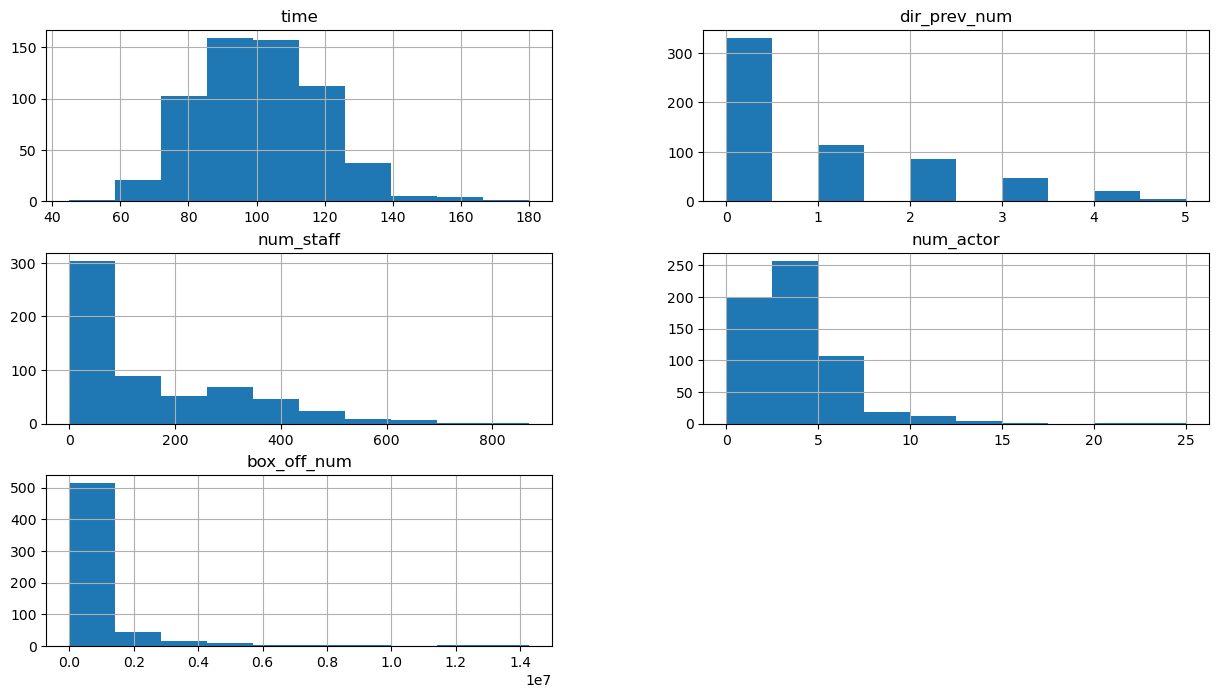

In [ ]:
train.hist(figsize = (15,8))

## feature, target 분리

In [ ]:
X_train = train.drop(['box_off_num'],axis= 1)
y_train = train['box_off_num']

In [ ]:
X_test = test

## scaling

In [ ]:
### 스케일링
# 원본 데이터 유지를 위해 복사 후 스케일링 진행

X_train_stan = X_train.copy()
X_test_stan = X_test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stan_fit = scaler.fit(X_train[['time', 'dir_prev_num', 'num_staff', 'num_actor']])
X_train_stan[['time', 'dir_prev_num', 'num_staff', 'num_actor']] = stan_fit.transform(X_train[['time', 'dir_prev_num', 'num_staff', 'num_actor']])
X_test_stan[['time', 'dir_prev_num', 'num_staff', 'num_actor']] = stan_fit.transform(X_test[['time', 'dir_prev_num', 'num_staff', 'num_actor']])

In [ ]:
X_train_stan.head(3)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,release_weekday
0,롯데엔터테인먼트,기타,-0.3,청소년 관람불가,-0.7,-0.4,-0.7,thur
1,(주)쇼박스,기타,1.6,청소년 관람불가,1.0,1.4,-0.3,thur
2,(주)쇼박스,기타,1.2,15세 관람가,2.6,1.2,0.1,wed


## 데이터 왜곡 처리

In [ ]:
y_train = np.log1p(y_train)
y_train.head()

0   10.1
1   15.8
2   15.8
3   12.3
4   13.1
Name: box_off_num, dtype: float64

## 범주형 변수 처리

In [ ]:
# 원핫 인코딩

X_train_stan = pd.get_dummies(data = X_train_stan, columns = ['distributor', 'genre','screening_rat','release_weekday'], prefix = ['distributor', 'genre','screening_rat','release_weekday'])
X_test_stan = pd.get_dummies(data = X_test_stan, columns = ['distributor', 'genre','screening_rat','release_weekday'], prefix = ['distributor', 'genre','screening_rat','release_weekday'])

# GBM
리더보드 점수: 1987078.25831

In [ ]:
X_test_stan.head()

,time,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,distributor_롯데엔터테인먼트,...,genre_드라마,genre_멜로/로맨스,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,release_weekday_etc,release_weekday_thur,release_weekday_wed
0,1.3,1.0,0.9,-0.3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.7,2.6,0.7,-0.3,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0.8,1.8,1.6,1.3,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0.8,1.0,1.6,-0.7,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.5,0.1,1.4,-1.1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train_stan, y_train)

# 테스트 세트에 대한 예측
y_pred = gbm.predict(X_test_stan)
y_pred

array([13.63502211, 14.44347498, 13.42075557, 14.34113033, 13.80880636,
        9.21178669,  8.47814885,  7.77956294,  8.61741804, 12.56194296,
       11.89677162, 13.57386245, 12.58415432,  7.27022183, 13.54285884,
       15.43717116,  8.4472353 , 12.53088394, 10.94947559, 11.4318858 ,
        7.05579698,  7.78223789, 12.99222099,  8.64791134,  7.17580319,
       12.3025511 ,  6.20922425, 13.92822703,  9.53888831,  8.68694065,
       14.26280017,  8.23072036,  8.8054877 , 11.46316299,  8.62565607,
        7.64547109,  8.2512735 ,  8.64530109,  7.91077468,  7.7546934 ,
        8.8932108 ,  8.70853415, 10.02111292, 10.31347825, 11.43774555,
       13.28997816,  7.27022183,  9.36632713,  9.89322771,  8.15987083,
        7.24465214, 13.58319249,  9.75166056, 14.19767571, 13.24724035,
       10.26443428,  9.46656692, 13.45398844, 14.37659058, 14.58833817,
       12.92339782, 14.63413518,  9.7312337 ,  7.4213798 , 10.19850271,
        6.83595266, 14.29163665,  7.97796088, 12.60474009,  9.84

In [ ]:
model=pd.DataFrame(y_pred)
model

,0
0,13.6
1,14.4
2,13.4
3,14.3
4,13.8
...,...
238,6.5
239,7.8
240,13.0
241,7.9


In [ ]:
submission['box_off_num']=model
submission

,title,box_off_num
0,용서는 없다,13.6
1,아빠가 여자를 좋아해,14.4
2,하모니,13.4
3,의형제,14.3
4,평행 이론,13.8
...,...,...
238,해에게서 소년에게,6.5
239,울보 권투부,7.8
240,어떤살인,13.0
241,말하지 못한 비밀,7.9


In [ ]:
submission.to_csv('submission.csv',index=False)

# LightGBM
리더보드 점수: 1987078.25831

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train_stan, y_train)

LGBMRegressor()

In [ ]:
y_pred = lgbm.predict(X_test_stan)
y_pred

array([13.97793074, 13.78074876, 13.05614905, 14.84043236, 14.22675065,
        8.92542285,  7.26736572,  7.58878676,  8.98668188, 11.62749222,
       12.05051243, 13.58691478, 12.43832067,  5.79755511, 13.59318632,
       15.33090269,  9.25933457, 12.72731259,  9.84485962, 11.20687091,
        6.70619384,  8.61411669, 13.23944612,  8.43288995,  6.5280952 ,
       12.92181873,  5.85452533, 14.01243787,  7.97015883,  9.2384398 ,
       14.30341537,  8.70845463,  8.48856332, 10.81714247,  9.25162903,
        8.71235827,  8.53117522,  8.94856438,  8.35237273,  6.72554899,
        9.27486618,  8.97597401,  9.54570781, 12.11658966, 14.46636902,
       13.23306279,  7.12672559,  9.33211419,  9.75289517,  7.36493199,
        7.92933002, 13.85828113,  9.4227592 , 13.78026766, 12.65358921,
       11.77497758, 10.03789066, 13.81795401, 13.71127159, 15.17387737,
       13.59283301, 14.89065922,  9.61729783,  6.06141223, 11.42881023,
        6.06555522, 13.53827532,  8.74508135, 12.95787254,  9.76

In [ ]:
model=pd.DataFrame(y_pred)
model

,0
0,14.0
1,13.8
2,13.1
3,14.8
4,14.2
...,...
238,5.9
239,8.3
240,12.1
241,7.1


In [ ]:
submission['box_off_num']=model
submission

,title,box_off_num
0,용서는 없다,14.0
1,아빠가 여자를 좋아해,13.8
2,하모니,13.1
3,의형제,14.8
4,평행 이론,14.2
...,...,...
238,해에게서 소년에게,5.9
239,울보 권투부,8.3
240,어떤살인,12.1
241,말하지 못한 비밀,7.1


In [ ]:
submission.to_csv('submission.csv',index=False)